In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [4]:
from statsmodels.graphics.api import qqplot

<br><br>

In [5]:
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [6]:
dta = sm.datasets.sunspots.load_pandas().data

In [7]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

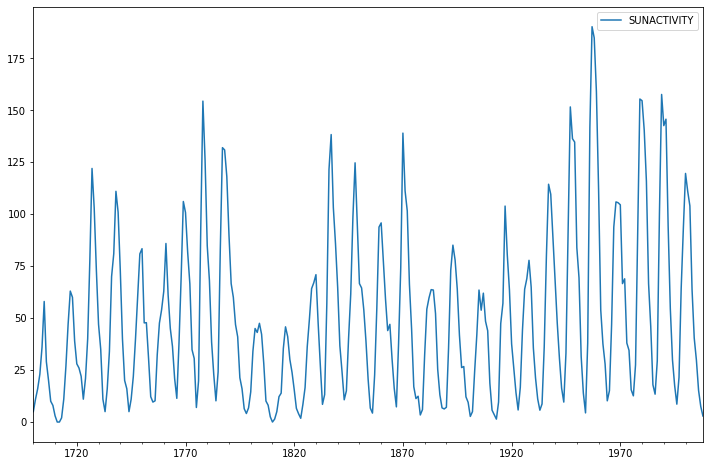

In [8]:
dta.plot(figsize=(12,8));

In [9]:
dta.isnull().sum()

SUNACTIVITY    0
dtype: int64

In [10]:
display(dta)

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0
...,...
2004-12-31,40.4
2005-12-31,29.8
2006-12-31,15.2
2007-12-31,7.5


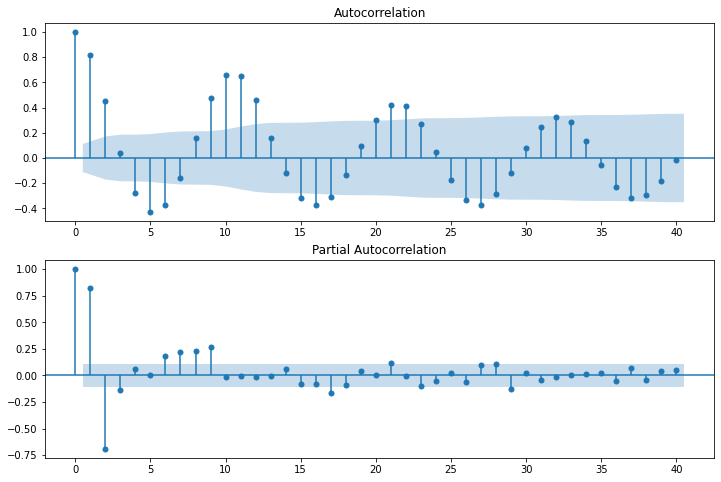

In [11]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)

fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)

fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

In [20]:
arma_mod20 = ARIMA(dta, order=(2, 0, 0)).fit()

C:\Users\tbresee\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
C:\Users\tbresee\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
C:\Users\tbresee\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'


In [21]:
print(arma_mod20.params)

const      49.746203
ar.L1       1.390630
ar.L2      -0.688573
sigma2    274.727195
dtype: float64


In [22]:
arma_mod30 = ARIMA(dta, order=(3, 0, 0)).fit()

C:\Users\tbresee\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
C:\Users\tbresee\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
C:\Users\tbresee\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'


In [23]:
print(arma_mod30.params)

const      49.751916
ar.L1       1.300815
ar.L2      -0.508103
ar.L3      -0.129643
sigma2    270.100803
dtype: float64


In [24]:
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

2622.637093617344 2637.5704587249347 2628.60748146259


In [25]:
print(arma_mod30.params)

const      49.751916
ar.L1       1.300815
ar.L2      -0.508103
ar.L3      -0.129643
sigma2    270.100803
dtype: float64


In [26]:
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)

2619.403629244981 2638.07033562947 2626.8666140515384


In [27]:
sm.stats.durbin_watson(arma_mod30.resid.values)

1.9564893294094385

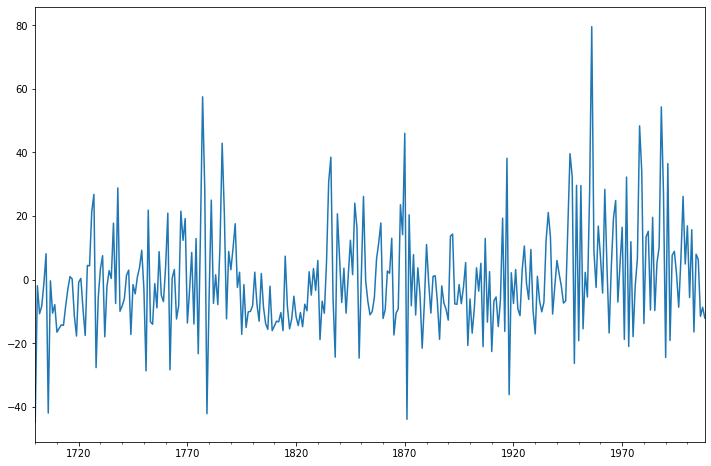

In [28]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax);

In [29]:
resid = arma_mod30.resid

In [30]:
stats.normaltest(resid)

NormaltestResult(statistic=49.84412427837457, pvalue=1.5013637830511263e-11)

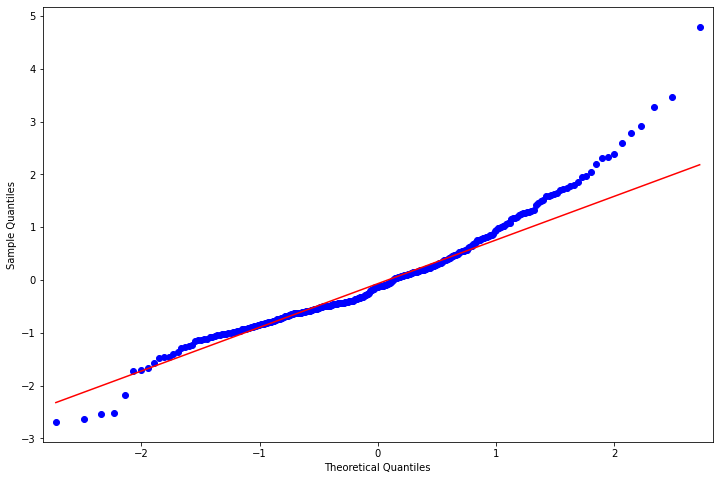

In [32]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

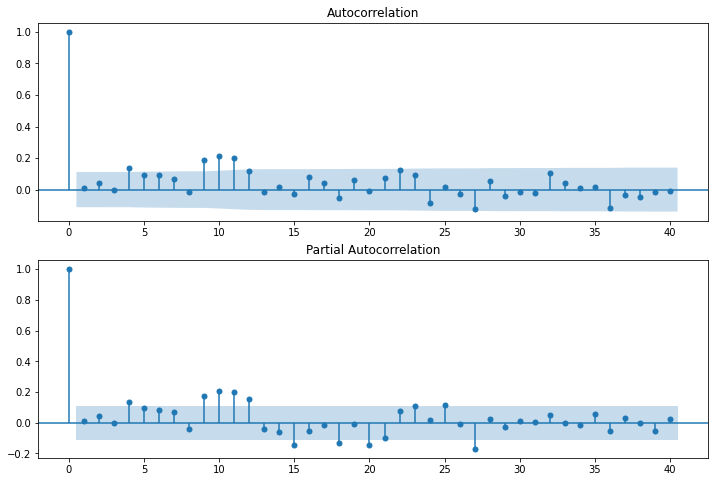

In [33]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [34]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), fft=True, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q      Prob(>Q)
lag                                    
1.0   0.009173   0.026256  8.712767e-01
2.0   0.041798   0.573124  7.508404e-01
3.0  -0.001334   0.573683  9.024297e-01
4.0   0.136089   6.409004  1.706149e-01
5.0   0.092467   9.111806  1.046868e-01
6.0   0.091948  11.793188  6.674479e-02
7.0   0.068748  13.297148  6.519100e-02
8.0  -0.015020  13.369178  9.976290e-02
9.0   0.187592  24.641825  3.394016e-03
10.0  0.213716  39.321684  2.229753e-05
11.0  0.201081  52.360707  2.345371e-07
12.0  0.117182  56.803797  8.575653e-08
13.0 -0.014054  56.867925  1.894211e-07
14.0  0.015400  56.945178  3.998275e-07
15.0 -0.024968  57.148942  7.742609e-07
16.0  0.080915  59.296336  6.873316e-07
17.0  0.041137  59.853280  1.111137e-06
18.0 -0.052022  60.746987  1.548687e-06
19.0  0.062497  62.041294  1.831911e-06
20.0 -0.010302  62.076582  3.381727e-06
21.0  0.074453  63.926259  3.194035e-06
22.0  0.124954  69.154307  8.979855e-07
23.0  0.093162  72.070598  5.800691e-07


In [35]:
predict_sunspots = arma_mod30.predict('1990', '2012', dynamic=True)
print(predict_sunspots)

1990-12-31    167.047946
1991-12-31    140.994097
1992-12-31     94.860809
1993-12-31     46.863131
1994-12-31     11.245227
1995-12-31     -4.718418
1996-12-31     -1.164010
1997-12-31     16.188419
1998-12-31     39.024289
1999-12-31     59.451892
2000-12-31     72.171813
2001-12-31     75.378224
2002-12-31     70.437834
2003-12-31     60.733062
2004-12-31     50.203490
2005-12-31     42.077983
2006-12-31     38.116472
2007-12-31     38.456966
2008-12-31     41.966160
2009-12-31     46.871548
2010-12-31     51.425374
2011-12-31     54.401670
2012-12-31     55.323515
Freq: A-DEC, dtype: float64


In [36]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

In [38]:
mean_forecast_err(dta.SUNACTIVITY, predict_sunspots)

5.63497971859234

### Exercise: Can you obtain a better fit for the Sunspots model? (Hint: sm.tsa.AR has a method select_order)


In [40]:
from statsmodels.tsa.arima_process import ArmaProcess